# Data Science Project: West Nile Virus Prediction

In this project, we aim to predict the presence of the West Nile Virus (WNV) using a dataset that includes environmental, weather, and mosquito population data. This project involves the following steps:

1. Loading and exploring the datasets.
2. Cleaning and preprocessing the data.
3. Feature engineering and transformations.
4. Visualizing data insights.
5. Applying machine learning models for prediction.
6. Evaluating model performance and generating predictions.

---

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta

from xgboost import XGBClassifier

from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

color = sns.color_palette()
sns.set_style('darkgrid')

#
[63]:
￼
# 2. Read data

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
weather = pd.read_csv('weather.csv')
spray = pd.read_csv('spray.csv')
print(f'\n---TRAIN DATA---\nNumber of rows: {data_train.shape[0]}\nColumns: {data_train.columns.to_list()}')
print(f'\n---TEST DATA---\nNumber of rows: {data_test.shape[0]}\nColumns: {data_test.columns.to_list()}')
print(f'\n---WEATHER DATA---\nNumber of rows: {weather.shape[0]}\nColumns: {weather.columns.to_list()}')
print(f'\n---SPRAY DATA---\nNumber of rows: {spray.shape[0]}\nColumns: {spray.columns.to_list()}')


---TRAIN DATA---
Number of rows: 10506
Columns: ['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent']

---TEST DATA---
Number of rows: 116293
Columns: ['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy']

---WEATHER DATA---
Number of rows: 2944
Columns: ['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']

---SPRAY DATA---
Number of rows: 14835
Columns: ['Date', 'Time', 'Latitude', 'Longitude']


## 3. Exploratory data analysis

In [3]:
data_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [4]:
data_test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [5]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [6]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [7]:
cols_to_drop = []

### Handling missing values in weather data

In [8]:
dfs = {
    'data_train': data_train,
    'data_test': data_test,
    'weather': weather,
    'spray': spray
}

for df_name in dfs.keys():
    print(df_name)
    print(f'\tNumber of nan: {dfs[df_name].isna().sum().sum()}')
    print(f'\tNumber of "M": {(dfs[df_name]=="M").sum().sum()}')

data_train
	Number of nan: 0
	Number of "M": 0
data_test
	Number of nan: 0
	Number of "M": 0
weather
	Number of nan: 0
	Number of "M": 7415
spray
	Number of nan: 584
	Number of "M": 0


In [9]:
missing_weather = pd.DataFrame((weather=='M').sum(), columns=['number'])
missing_weather['percent'] = (missing_weather.number/weather.shape[0]*100).round(1)
missing_weather

,number,percent
Station,0,0.0
Date,0,0.0
Tmax,0,0.0
Tmin,0,0.0
Tavg,11,0.4
Depart,1472,50.0
DewPoint,0,0.0
WetBulb,4,0.1
Heat,11,0.4
Cool,11,0.4


In [10]:
# drop column with no values
cols_to_drop.append('Water1')

In [11]:
weather_temp = weather[weather['Station']==2]
(weather_temp[['Depart', 'Depth', 'SnowFall']]=='M').sum()

Depart      1472
Depth       1472
SnowFall    1472
dtype: int64

In [12]:
cols_to_drop.append('Depart')

for c in ['Depth', 'SnowFall']:
    display(weather.groupby('Station')[c].value_counts())

Station  Depth
1        0        1472
2        M        1472
Name: count, dtype: int64

Station  SnowFall
1        0.0         1459
           T           12
         0.1            1
2        M           1472
Name: count, dtype: int64

In [13]:
cols_to_drop += ['Depth', 'SnowFall']

In [14]:
# check whether 'Tavg' is average of max and min by looking at values of their difference
weather_temp = weather[weather.Tavg!='M']
(weather_temp.Tavg.astype('int') - (weather_temp[['Tmax', 'Tmin']].mean(axis=1)).round()).value_counts()


0.0    2172
1.0     761
Name: count, dtype: int64

In [15]:
# close enough to replace 'M' in Tavg with mean of Tmin and Tmax 
weather.Tavg = np.where(
    weather.Tavg == 'M',
    weather[['Tmax', 'Tmin']].mean(axis=1),
    weather.Tavg
).astype('int')

In [16]:
weather[weather.WetBulb=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
848,1,2009-06-26,86,69,78,7,60,M,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
2412,1,2013-08-11,81,60,71,-2,61,M,0,6,...,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0
2415,2,2013-08-12,85,69,77,M,63,M,0,12,...,RA,M,M,M,0.66,29.27,29.92,4.5,26,7.7


In [17]:
weather_temp = weather[weather.WetBulb!='M']
weather_temp[['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb']].astype('float').corr()

,Tmax,Tmin,Tavg,DewPoint,WetBulb
Tmax,1.000000,0.859913,0.967582,0.801644,0.904672
Tmin,0.859913,1.000000,0.960372,0.904381,0.951474
Tavg,0.967582,0.960372,1.000000,0.881452,0.960776
DewPoint,0.801644,0.904381,0.881452,1.000000,0.972501
WetBulb,0.904672,0.951474,0.960776,0.972501,1.000000


'WetBulb' is strongly correlated with 'DewPoint' and temperature.  
We will use monthly median to replace 'M' values.

In [18]:
weather['MonthYear'] = weather.Date.str[:7]

def replace_with_monthly_median(df, col):
    monthly_medians = df[df[col]!='M'][['MonthYear', col]].groupby('MonthYear').agg(
        lambda x: x.astype('float').median()
    )
    df[col] = np.where(
        df[col]=='M',
        monthly_medians.loc[df['MonthYear']][col],
        df[col]
    ).astype('float')

In [19]:
replace_with_monthly_median(weather, 'WetBulb')

Columns 'Heat' and 'Cool' - how many degrees above and below (respectively) 65F. We will drop these columns.

In [20]:
cols_to_drop += ['Heat', 'Cool']

In [21]:
weather.PrecipTotal.str.strip().value_counts().sort_index()

PrecipTotal
0.00    1577
0.01     127
0.02      63
0.03      46
0.04      36
        ... 
4.73       1
6.64       1
6.86       1
M          2
T        318
Name: count, Length: 168, dtype: int64

'T'(trace) represents value > 0 and < 0.01. We will replace 'T' with '0.001' and 'M' with monthly median. 

In [22]:
weather.PrecipTotal = weather.PrecipTotal.str.strip().str.replace('T', '0.001')

replace_with_monthly_median(weather, 'PrecipTotal')

In [23]:
for c in ['StnPressure', 'SeaLevel', 'AvgSpeed']:
    replace_with_monthly_median(weather, c)

### Format non-numerical weather columns

In [24]:
weather.Date = pd.to_datetime(weather.Date)

In [25]:
weather.CodeSum = weather.CodeSum.str.split(' ').apply(lambda x: [i for i in x if i!=''])
set(weather.CodeSum.sum())

{'BCFG',
 'BR',
 'DZ',
 'FG',
 'FG+',
 'FU',
 'GR',
 'HZ',
 'MIFG',
 'RA',
 'SN',
 'SQ',
 'TS',
 'TSRA',
 'VCFG',
 'VCTS'}

4-character codes are two 2-character codes

In [26]:
def correct_codes(code_list):
    new_list = []
    for code in code_list:
        new_list.append(code[:2])  # we remove '+' or '-'
        if len(code)==4:
            new_list.append(code[2:])
    return new_list

weather.CodeSum = weather.CodeSum.apply(correct_codes)

In [27]:
mlb = MultiLabelBinarizer()
code_arr = mlb.fit_transform(weather.CodeSum)

for i in range(mlb.classes_.shape[0]):
    weather[mlb.classes_[i]] = code_arr[:,i]

In [28]:
cols_to_drop += ['Sunrise', 'Sunset', 'MonthYear', 'CodeSum']

In [29]:
weather.drop(cols_to_drop, axis=1, inplace=True)
cols_to_drop=[]

### Merge data from stations 1 and 2

In [30]:
weather_st1 = weather[weather.Station==1].drop('Station', axis=1)
weather_st2 = weather[weather.Station==2].drop('Station', axis=1)
weather = weather_st1.merge(weather_st2, on='Date', suffixes=['_1', '_2'])

### Virus presence

In [31]:
wnv = data_train.WnvPresent.value_counts()
print(wnv)
print(f'\nPercent of positive cases:\n{round(wnv[1]/(wnv[0]+wnv[1]),2)}')

WnvPresent
0    9955
1     551
Name: count, dtype: int64

Percent of positive cases:
0.05


Data are highly imbalanced. ROC_AUC metric is a good choice for assessing model performance.

In [32]:
data_train.Date = pd.to_datetime(data_train.Date)
data_train['Year'] = data_train.Date.dt.year
data_train['Month'] = data_train.Date.dt.month

In [33]:
display(data_train.groupby(['Year']).agg(
    positive_cases = ('WnvPresent','sum'),
    percent = ('WnvPresent',lambda x: (x.mean()*100).round(2)))
)
display(data_train.groupby(['Month']).agg(
    positive_cases = ('WnvPresent','sum'),
    percent = ('WnvPresent',lambda x: (x.mean()*100).round(2)))
)
display(data_train.groupby(['Year','Month']).agg(
    positive_cases = ('WnvPresent','sum'),
    percent = ('WnvPresent',lambda x: (x.mean()*100).round(2)))
)

,positive_cases,percent
Year,,
2007,236,6.19
2009,19,0.84
2011,57,2.78
2013,239,9.99


,positive_cases,percent
Month,,
5,0,0.00
6,1,0.06
7,46,1.77
8,377,10.05
9,125,5.64
10,2,0.72


positive_cases  percent
Year Month                         
2007 5                   0     0.00
     6                   0     0.00
     7                   6     1.04
     8                 200     9.76
     9                  28     3.62
     10                  2     0.95
2009 5                   0     0.00
     6                   0     0.00
     7                   5     0.66
     8                   9     2.41
     9                   5     1.20
     10                  0     0.00
2011 6                   0     0.00
     7                  11     1.72
     8                  24     4.87
     9                  22     4.07
2013 6                   1     0.23
     7                  24     3.77
     8                 144    17.27
     9                  70    14.40

In [34]:
nmos = data_train.groupby('WnvPresent').NumMosquitos.sum()
print(f'Fraction of infected mosquitos weighted by "NumMosquitos": {(nmos[1]/(nmos[0]+nmos[1])).round(2)}')

Fraction of infected mosquitos weighted by "NumMosquitos": 0.11


### Virus testing days

In [35]:
data_test.Date = pd.to_datetime(data_test.Date)

print(f'WNV test days: {set(data_train.Date.dt.dayofweek.unique()).union(set(data_test.Date.dt.dayofweek.unique()))}')

WNV test days: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4)}


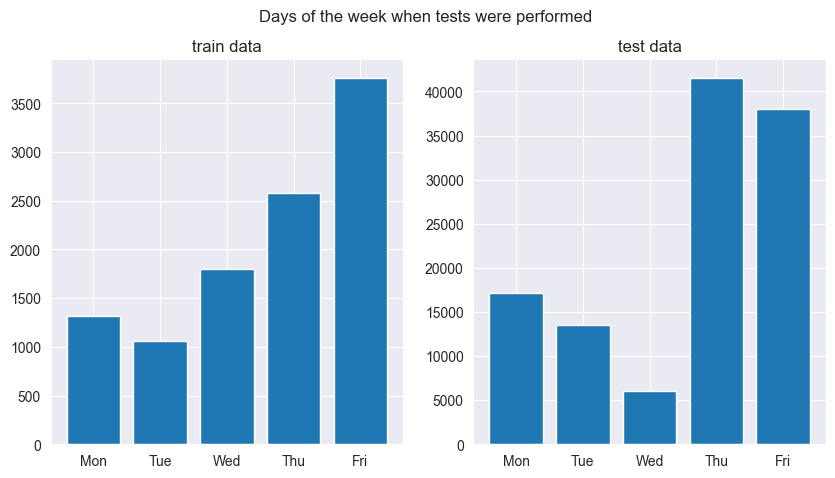

In [36]:
weekdays = ['Mon','Tue', 'Wed', 'Thu', 'Fri']
num2day = {i:weekdays[i] for i in range(5)}  # No tests during weekends
dayofweek_cnt_train = data_train.Date.dt.dayofweek.map(num2day).value_counts().loc[weekdays]
dayofweek_cnt_test = data_test.Date.dt.dayofweek.map(num2day).value_counts().loc[weekdays]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].bar(dayofweek_cnt_train.index, dayofweek_cnt_train)
ax[0].set_title('train data')
ax[1].bar(dayofweek_cnt_test.index, dayofweek_cnt_test)
ax[1].set_title('test data')
plt.suptitle('Days of the week when tests were performed')
plt.show()

As it is stated in the problem description, mosquitos are catched in traps from Monday to Wednesday and are tested for the West Nile virus by the end of the week. The 'Date' column in train and test datasets contains a date of a test. We can conclude that tested mosquitos were captured during the same week and no later than Wednesday or the test date. Thus, for tests taken on Monday we will assume that mosquitos were collected on the same day. For tests taken on Tuesday we will assume that mosquitos were collected either on Monday or Tuesday. For tests taken on Wednesday, Thursday or Friday we will assume the mosquitos were collected on any day from Monday to Wednesday. This consideration may be important when deciding what time range of weather data should be included in additional features related to weather conditions.

### Species

In [37]:
print(f'Train data species:\n{data_train.Species.value_counts()}')
print(f'\nTest data species:\n{data_test.Species.value_counts()}')

Train data species:
Species
CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: count, dtype: int64

Test data species:
Species
CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX PIPIENS             14521
CULEX SALINARIUS          14355
CULEX TERRITANS           14351
CULEX TARSALIS            14347
UNSPECIFIED CULEX         14345
CULEX ERRATICUS           14345
Name: count, dtype: int64


We can see that train dataset does not include all of the species present in the test set. Also, two species are very poorly represented in the training data. At the same time we can see completely different species distribution in the test dataset.

In [38]:
species = data_train.Species.value_counts().to_frame()
species['wnv_present_cnt'] = data_train.groupby('Species').WnvPresent.sum()
species['wnv_present_pct'] = data_train.groupby('Species').WnvPresent.mean().round(4)*100
species

,count,wnv_present_cnt,wnv_present_pct
Species,,,
CULEX PIPIENS/RESTUANS,4752,262,5.51
CULEX RESTUANS,2740,49,1.79
CULEX PIPIENS,2699,240,8.89
CULEX TERRITANS,222,0,0.00
CULEX SALINARIUS,86,0,0.00
CULEX TARSALIS,6,0,0.00
CULEX ERRATICUS,1,0,0.00


Positive cases are provided only for 3 most common species.

### Traps

In [39]:
print(f'Number of traps:\n \
    data_train - {data_train.Trap.nunique()}\n \
    data_test - {data_test.Trap.nunique()}')

Number of traps:
     data_train - 136
     data_test - 149


In [40]:
trap_diff = set(data_test.Trap.unique())-set(data_train.Trap.unique())
print(f'Traps not present in training data:\n{trap_diff}') 

Traps not present in training data:
{'T218C', 'T200A', 'T234', 'T002A', 'T128A', 'T218A', 'T090C', 'T002B', 'T090A', 'T218B', 'T200B', 'T065A', 'T090B'}


### Spray

In [41]:
spray['Date'] = pd.to_datetime(spray.Date)
spray['Year'] = spray.Date.dt.year
spray['Month'] = spray.Date.dt.month

spray.groupby(['Year', 'Month']).size()

Year  Month
2011  8          95
      9        2114
2013  7        3809
      8        7893
      9         924
dtype: int64

We want be using spray data in this project

## 4. Feature engineering

In [42]:
data_train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Year', 'Month'],
      dtype='object')

#### Extract date related features

In [43]:
def split_date(df):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Dayofweek'] = df['Date'].dt.dayofweek
    df['Dayofyear'] = df['Date'].dt.dayofyear

split_date(data_train)
split_date(data_test)

### Drop address

In [44]:
def drop_address(df):
    df.drop(['Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy'], axis=1, inplace=True)
    
drop_address(data_train)
drop_address(data_test)

###  Handle categorical features

In [45]:
np.hstack([data_train.Species.unique(), data_test.Species.unique()])

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS',
       'CULEX PIPIENS', 'CULEX SALINARIUS', 'CULEX TERRITANS',
       'CULEX TARSALIS', 'UNSPECIFIED CULEX', 'CULEX ERRATICUS'],
      dtype=object)

In [46]:
oe_species = OrdinalEncoder()
oe_species.fit(np.hstack([data_train.Species.unique(), data_test.Species.unique()]).reshape(-1,1))
data_train['Species'] = oe_species.transform(data_train.Species.values.reshape(-1,1))
data_test['Species'] = oe_species.transform(data_test.Species.values.reshape(-1, 1))

In [47]:
# replace satellite trap with main trap
data_train.Trap = data_train.Trap.str[:4]
data_test.Trap = data_test.Trap.str[:4]

oe_traps = OrdinalEncoder()
oe_traps.fit(np.hstack([data_train.Trap.unique(), data_test.Trap.unique()]).reshape(-1,1))
data_train['Trap'] = oe_traps.transform(data_train.Trap.values.reshape(-1,1))
data_test['Trap'] = oe_traps.transform(data_test.Trap.values.reshape(-1,1))

In [48]:
data_train.Year = data_train.Year % 2007/2
data_test.Year = data_test.Year % 2007/2

### Aggregate weather data

Calculate moving average with window 3 (this is due to not being able to give precise date of collecting mosquitos)

In [49]:
def aggregate_weather(df_weather, window=3):
    df_weather = df_weather.sort_values('Date').reset_index(drop=True)

    agg_cols = [c for c in df_weather.columns if c != 'Date']

    weather_agg = df_weather.rolling(window, on='Date').mean()

    weather_agg.loc[0, agg_cols] = df_weather.loc[0, agg_cols]
    for i in range(1, window-1):
        weather_agg.loc[i, agg_cols] = df_weather.loc[0:(i+1), agg_cols].mean(
            axis=0)

    return weather_agg

weather_agg = aggregate_weather(weather)

### Join virus testing data and aggregated weather data

In [50]:
def add_max_catch_date(df):
    df['MaxCatchDate'] = np.where(
        df.Dayofweek<3,
        df.Date,
        np.where(
            df.Dayofweek==3,
            df.Date - timedelta(days=1),
            df.Date - timedelta(days=2)
        )
    )
    
add_max_catch_date(data_train)
add_max_catch_date(data_test)

In [51]:
data_train = data_train.merge(weather_agg, left_on='MaxCatchDate', right_on='Date')
data_test = data_test.merge(weather_agg, left_on='MaxCatchDate', right_on='Date')

In [52]:
cols_to_drop = ['Date_x', 'Date_y', 'Day', 'Dayofweek', 'MaxCatchDate']
data_train.drop(cols_to_drop+['NumMosquitos'], axis=1, inplace=True)
data_test.drop(cols_to_drop+['Id'], axis=1, inplace=True)

In [53]:
labels = data_train.pop('WnvPresent')

In [54]:
print(data_train.columns)
print(data_test.columns)

Index(['Species', 'Trap', 'Latitude', 'Longitude', 'Year', 'Month',
       'Dayofyear', 'AvgSpeed_1', 'AvgSpeed_2', 'BC_1', 'BC_2', 'BR_1', 'BR_2',
       'DZ_1', 'DZ_2', 'DewPoint_1', 'DewPoint_2', 'FG_1', 'FG_2', 'FU_1',
       'FU_2', 'GR_1', 'GR_2', 'HZ_1', 'HZ_2', 'MI_1', 'MI_2', 'PrecipTotal_1',
       'PrecipTotal_2', 'RA_1', 'RA_2', 'ResultDir_1', 'ResultDir_2',
       'ResultSpeed_1', 'ResultSpeed_2', 'SN_1', 'SN_2', 'SQ_1', 'SQ_2',
       'SeaLevel_1', 'SeaLevel_2', 'StnPressure_1', 'StnPressure_2', 'TS_1',
       'TS_2', 'Tavg_1', 'Tavg_2', 'Tmax_1', 'Tmax_2', 'Tmin_1', 'Tmin_2',
       'VC_1', 'VC_2', 'WetBulb_1', 'WetBulb_2'],
      dtype='object')
Index(['Species', 'Trap', 'Latitude', 'Longitude', 'Month', 'Year',
       'Dayofyear', 'AvgSpeed_1', 'AvgSpeed_2', 'BC_1', 'BC_2', 'BR_1', 'BR_2',
       'DZ_1', 'DZ_2', 'DewPoint_1', 'DewPoint_2', 'FG_1', 'FG_2', 'FU_1',
       'FU_2', 'GR_1', 'GR_2', 'HZ_1', 'HZ_2', 'MI_1', 'MI_2', 'PrecipTotal_1',
       'PrecipTotal_2', 'RA

In [55]:
data_test = data_test[data_train.columns]

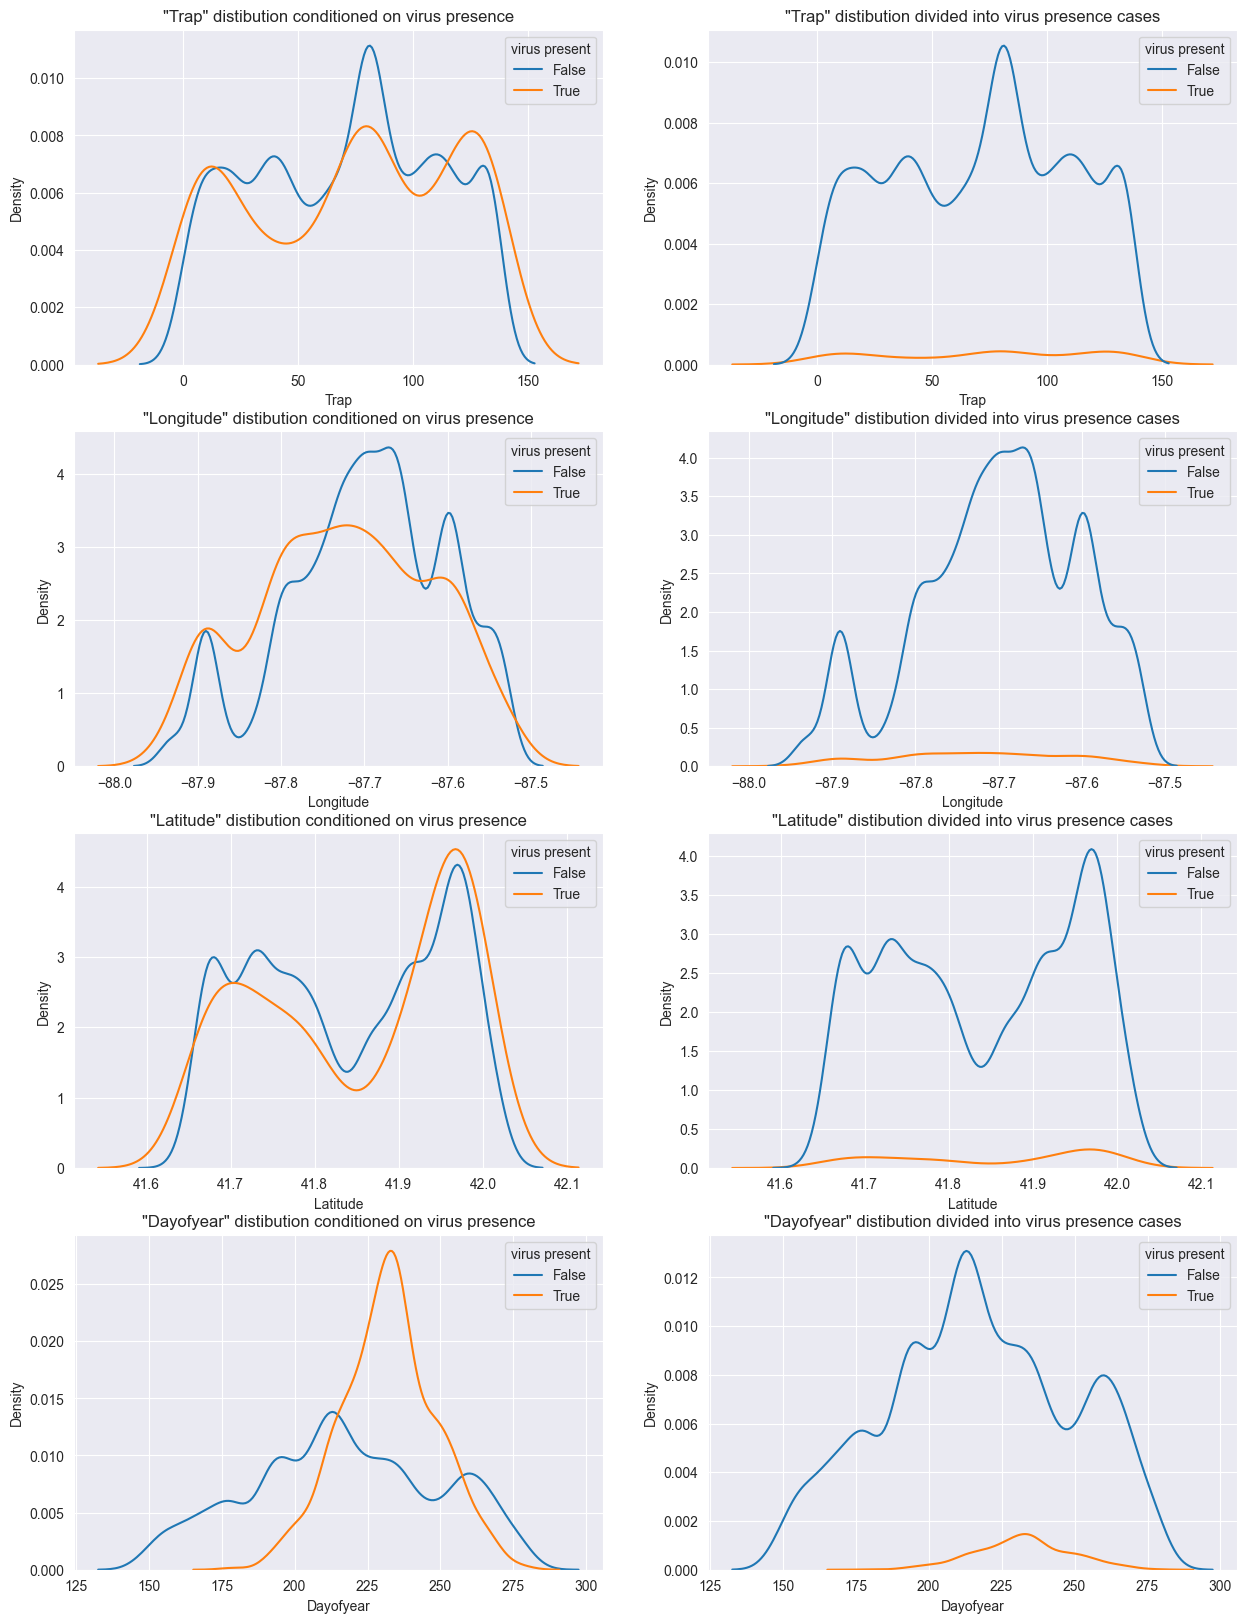

In [56]:
df = data_train.copy()
df['virus present'] = labels.astype('bool')
cols_to_plot = ['Trap', 'Longitude', 'Latitude', 'Dayofyear']
col_num = len(cols_to_plot)

fig, ax = plt.subplots(col_num,2, figsize=(15,20))
for i in range(col_num):
    sns.kdeplot(df[labels==0][cols_to_plot[i]], ax=ax[i,0], label='False')
    sns.kdeplot(df[labels==1][cols_to_plot[i]], ax=ax[i,0], label='True')
    ax[i,0].set_title(f'"{cols_to_plot[i]}" distibution conditioned on virus presence')
    ax[i,0].legend(title='virus present')
    sns.kdeplot(x=cols_to_plot[i], data=df, hue='virus present', ax=ax[i,1])
    ax[i,1].set_title(f'"{cols_to_plot[i]}" distibution divided into virus presence cases')

### Scale features

In [57]:
scaler = StandardScaler()
scaler.fit(data_train)
cols = data_train.columns
data_train[cols] = scaler.transform(data_train)
data_test[cols] = scaler.transform(data_test)
    

### Visualize training data

c:\Users\ghass\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ghass\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


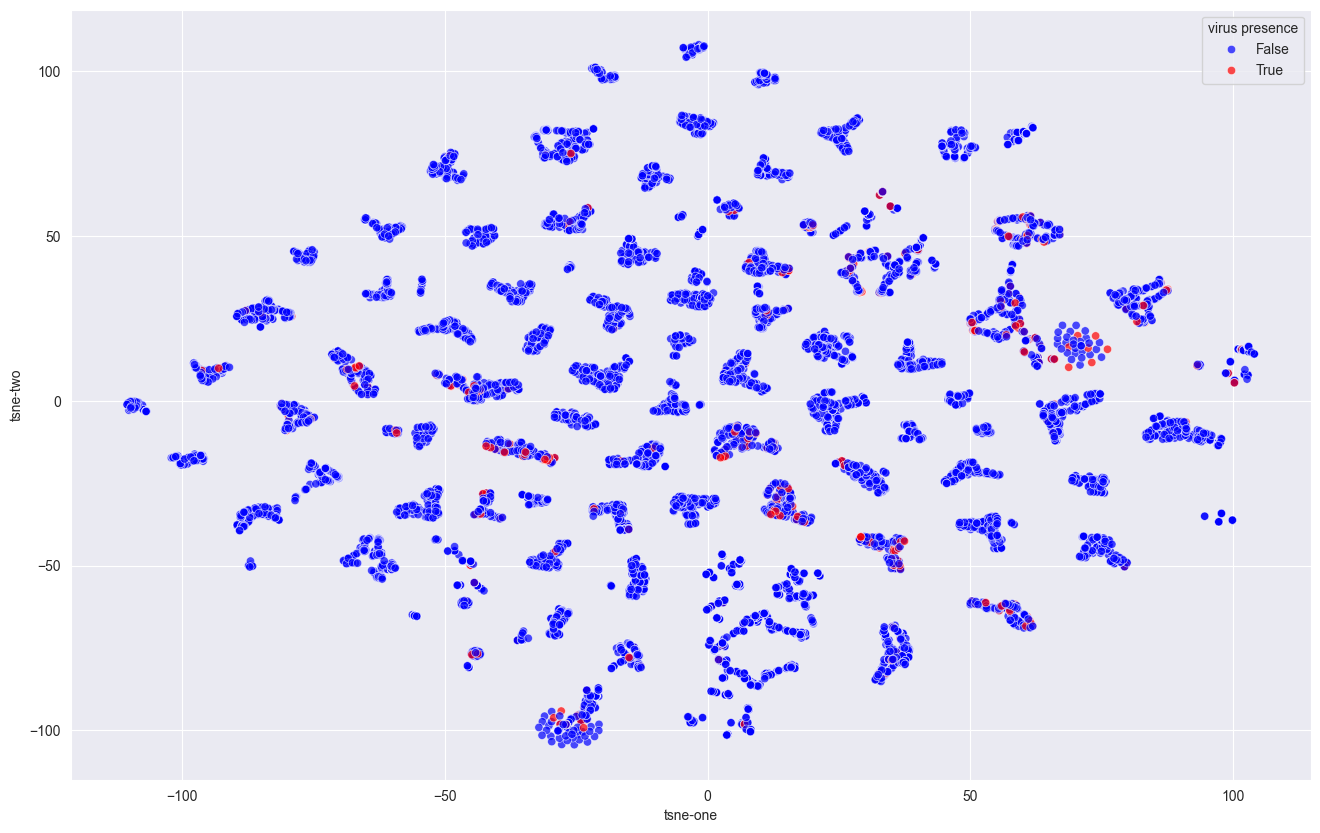

In [58]:
tsne = TSNE(n_components=2)
X = tsne.fit_transform(data_train)

df = pd.DataFrame()
df['tsne-one'] = X[:,0]
df['tsne-two'] = X[:,1]
df['virus presence']=labels.astype('bool')

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", 
    y="tsne-two",
    data=df,
    hue="virus presence",
    palette=['blue', 'red'],
    alpha=0.7
)
plt.show()

## 5. Model training

In [59]:
param_grid = {
    'n_estimators': [40, 50, 60],
    'max_depth': [4, 5, 6],
    'reg_alpha': [0.1, 0.5, 1],
    'reg_lambda': [1, 10],
    'gamma': [0, 0.5],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 3]
}

xgb = XGBClassifier(scale_pos_weight=20)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
model = GridSearchCV(
    param_grid=param_grid,
    estimator=xgb,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

model.fit(data_train, labels)
best_model = model.best_estimator_

Fitting 15 folds for each of 216 candidates, totalling 3240 fits


In [60]:
print(f'Best_model params: {model.best_params_}')
print(f'Best score: {round(model.best_score_, 4)}')

Best_model params: {'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 40, 'reg_alpha': 0.5, 'reg_lambda': 10}
Best score: 0.8494


### Feature importance

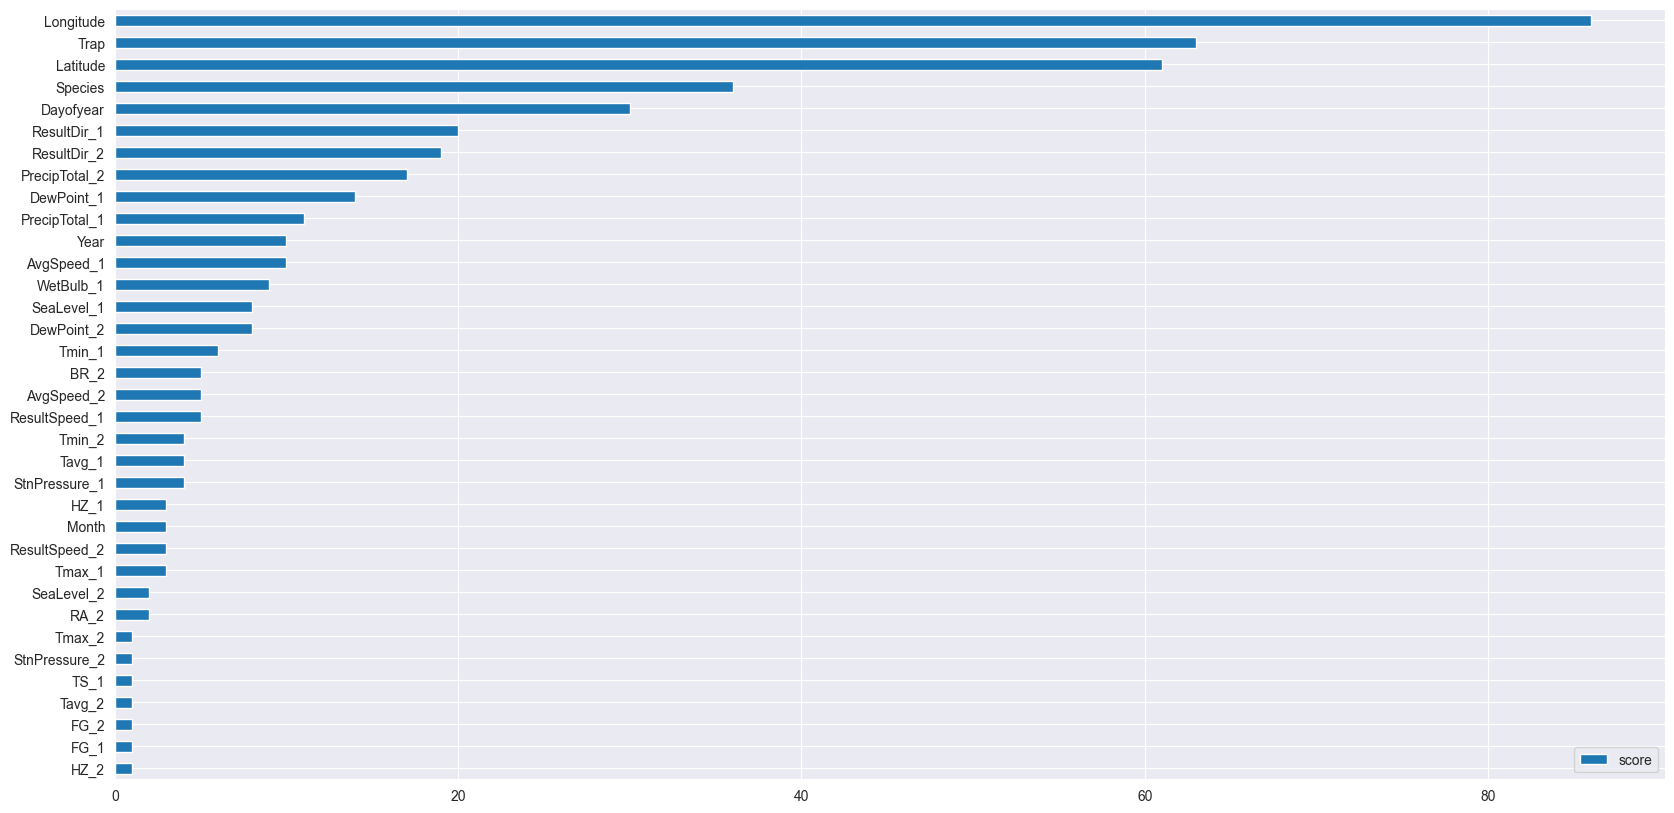

In [61]:
feature_important = best_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values("score")
data.plot(kind='barh', figsize = (20,10));


In [62]:
model.best_estimator_.fit(data_train, labels)
predictions = model.best_estimator_.predict_proba(data_test[cols])[:,1]
sample = pd.read_csv('sampleSubmission.csv')
sample['WnvPresent'] = predictions
sample.to_csv('xgb_predictions2.csv', index=False)

## Conclusion
This project demonstrated the process of cleaning, preprocessing, and modeling the West Nile Virus dataset. We successfully built a predictive model using XGBoost, tuned the model's parameters, and visualized the important features for prediction.